In [4]:
import numpy as np
import pandas as pd

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout,Flatten
from keras.utils import np_utils

In [3]:
np.random.seed(20)

In [7]:
forest = pd.read_csv("C:/Users/anjum/Documents/Exelir workshop/Dataset/forestfires.csv")

In [14]:
forest.head()


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [8]:
forest['size_category'] = forest['area'].apply(lambda x: 'small' if x <5 else 'large')


In [ ]:
forest.describe()

In [ ]:
forest.info()

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
#converting into binary
lb = LabelEncoder()
forest["size_category"] = lb.fit_transform(forest["size_category"])

In [32]:
#Preparing the Training and Testing Data Sets
predictors = forest.iloc[:,2:10].values

In [33]:
predictors

array([[ 86.2,  26.2,  94.3, ...,  51. ,   6.7,   0. ],
       [ 90.6,  35.4, 669.1, ...,  33. ,   0.9,   0. ],
       [ 90.6,  43.7, 686.9, ...,  33. ,   1.3,   0. ],
       ...,
       [ 81.6,  56.7, 665.6, ...,  70. ,   6.7,   0. ],
       [ 94.4, 146. , 614.7, ...,  42. ,   4. ,   0. ],
       [ 79.5,   3. , 106.7, ...,  31. ,   4.5,   0. ]])

In [34]:
outcomes = forest.iloc[:,30].values

In [18]:
from sklearn import preprocessing


In [36]:
min_max_scaler = preprocessing.MinMaxScaler()
predictors_scaled = min_max_scaler.fit_transform(predictors)
predictors_scaled[:5,]

array([[0.87096774, 0.08649207, 0.1013252 , 0.09090909, 0.19292605,
        0.42352941, 0.7       , 0.        ],
       [0.92774194, 0.11819435, 0.77541926, 0.11942959, 0.50803859,
        0.21176471, 0.05555556, 0.        ],
       [0.92774194, 0.14679531, 0.79629412, 0.11942959, 0.39871383,
        0.21176471, 0.1       , 0.        ],
       [0.94193548, 0.11095796, 0.08162308, 0.16042781, 0.19614148,
        0.96470588, 0.4       , 0.03125   ],
       [0.91096774, 0.17298415, 0.11058989, 0.17112299, 0.29581994,
        0.98823529, 0.15555556, 0.        ]])

In [37]:
from sklearn import model_selection
from keras import models, layers, metrics


In [38]:
#Finally, we split the data into a training set and a testing set. These will in turn be used to train and evaluate the regression model respectively.

X_train, X_test, y_train, y_test = model_selection.train_test_split(predictors, outcomes, test_size=0.33, random_state=22)
print('X_train {0}, y_train {1}'.format(X_train.shape, y_train.shape))
print('X_test {0}, y_test {1}'.format(X_test.shape, y_test.shape))

X_train (346, 8), y_train (346,)
X_test (171, 8), y_test (171,)


In [39]:
network = models.Sequential()
network.add(layers.Dense(10, activation='relu', input_shape=(X_train.shape[1], )))
network.add(layers.Dense(5, activation='relu'))
network.add(layers.Dense(1))
network.compile(optimizer='adam',
                loss='mean_squared_error')

In [40]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


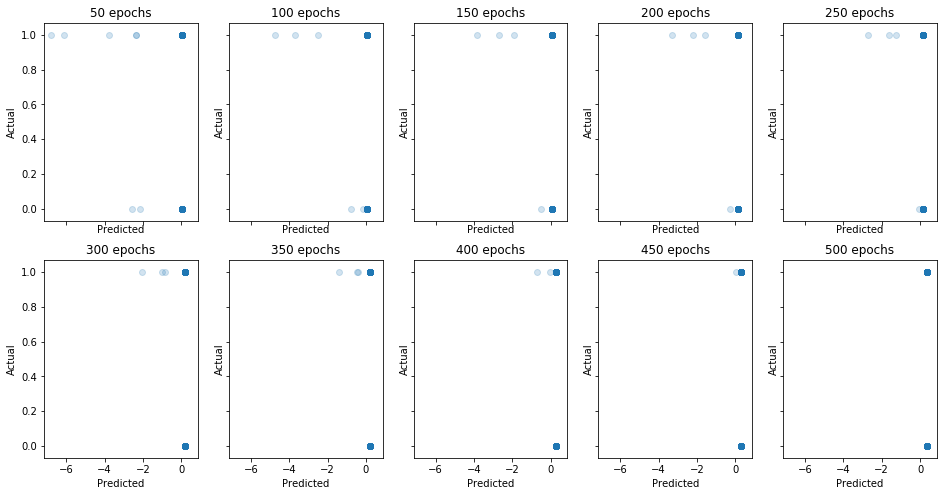

In [41]:
fig, axes = plt.subplots(2, 5, figsize=(16,8), sharex=True, sharey=True)
losses = []
for i in range(2):
    for j in range(5):
        network.fit(X_train, y_train, epochs=50, batch_size=128, verbose=0);
        pred_loss = network.evaluate(X_test, y_test, verbose=0)
        losses.append(pred_loss)
        preds = network.predict(X_test)
        axes[i,j].scatter(preds, y_test, alpha=0.2)
        axes[i,j].set_title('{0} epochs'.format((5*i+j+1)*50))
        axes[i,j].set_ylabel('Actual')
        axes[i,j].set_xlabel('Predicted')

Mean squared error: 0.27


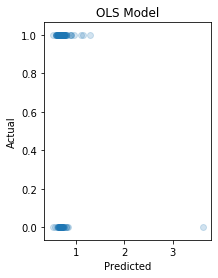

In [42]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
ols_y_pred = regr.predict(X_test)

fig, ax = plt.subplots(1, 1, figsize=(3,4))
ax.scatter(ols_y_pred, y_test, alpha=0.2)
ax.set_title('OLS Model'.format((5*i+j+1)*50))
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')

print("Mean squared error: {0:.2f}".format(mean_squared_error(y_test, ols_y_pred)))